In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        
from sklearn.datasets import make_blobs
import math
import scipy as sp


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [31]:
cluster=pd.read_csv('VitalSign_Sample.csv',encoding='ANSI')

In [45]:
cluster['fm']=cluster['성별'].map({'M':1,'F':0})

In [46]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      637 non-null    object
 1   키       637 non-null    int64 
 2   몸무게     637 non-null    int64 
 3   수축기혈압   637 non-null    int64 
 4   이완기혈압   637 non-null    int64 
 5   fm      637 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 34.8+ KB


In [47]:
cluster=cluster[(cluster['키']>=130)&(cluster['몸무게']>=5)&(cluster['몸무게']<=140)&(cluster['수축기혈압']>=5)&(cluster['이완기혈압']>=5)] 

In [48]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      637 non-null    object
 1   키       637 non-null    int64 
 2   몸무게     637 non-null    int64 
 3   수축기혈압   637 non-null    int64 
 4   이완기혈압   637 non-null    int64 
 5   fm      637 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 34.8+ KB


In [49]:
cluster=cluster.astype({'fm':'object'})

In [50]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      637 non-null    object
 1   키       637 non-null    int64 
 2   몸무게     637 non-null    int64 
 3   수축기혈압   637 non-null    int64 
 4   이완기혈압   637 non-null    int64 
 5   fm      637 non-null    object
dtypes: int64(4), object(2)
memory usage: 34.8+ KB


In [51]:
cluster_f=cluster[['키','몸무게','fm']]

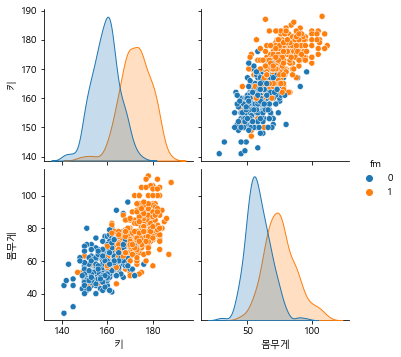

In [52]:
sns.pairplot(cluster_f,hue='fm')

In [53]:
from sklearn.cluster import KMeans

In [54]:
ks=range(1,10)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(cluster_f)
    inertias.append(model.inertia_)

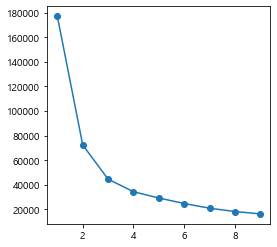

In [55]:
plt.figure(figsize=(4,4))

plt.plot(ks,inertias,'-o')
plt.show()

In [56]:
clust_model=KMeans(n_clusters=2)
clust_model.fit(cluster_f)

centers=clust_model.cluster_centers_
pred=clust_model.predict(cluster_f)

print(pd.DataFrame(centers))
print(pred[:10])

            0          1         2
0  159.959016  57.418033  0.224044
1  173.291513  79.653137  0.863469
[1 1 0 0 0 0 0 0 1 1]


In [63]:
clust_df=cluster_f.copy()
clust_df['clust']=pred
clust_df.to_json()

'{"\\ud0a4":{"0":175,"1":174,"2":168,"4":160,"5":156,"6":160,"7":156,"9":166,"10":176,"11":177,"12":154,"13":172,"14":150,"15":161,"16":170,"18":177,"19":160,"20":178,"21":150,"22":176,"23":168,"24":175,"25":165,"26":160,"27":153,"28":164,"30":153,"31":169,"32":158,"33":180,"34":170,"35":160,"36":168,"37":157,"38":173,"39":170,"40":168,"41":151,"42":153,"43":167,"45":162,"47":154,"48":168,"49":175,"50":156,"51":182,"52":169,"53":174,"54":160,"55":173,"56":182,"57":152,"58":152,"59":164,"60":163,"61":165,"62":174,"63":172,"64":168,"66":160,"67":156,"68":170,"69":168,"70":157,"71":170,"72":167,"73":167,"74":157,"75":177,"76":160,"77":165,"78":173,"79":150,"80":183,"81":158,"82":175,"83":176,"84":154,"85":167,"86":152,"87":164,"88":164,"89":169,"90":160,"91":165,"92":158,"94":158,"95":177,"97":159,"99":173,"100":173,"101":173,"102":156,"104":156,"105":182,"106":173,"107":158,"108":149,"109":164,"110":152,"111":173,"112":160,"113":157,"116":150,"117":158,"118":165,"119":177,"120":164,"121"

In [59]:
clust_df.head(50)

,키,몸무게,fm,clust
0,175,75,1,1
1,174,68,0,1
2,168,65,0,0
4,160,55,0,0
5,156,55,0,0
6,160,53,0,0
7,156,67,0,0
9,166,67,1,0
10,176,78,1,1
11,177,87,1,1


In [25]:
clust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   키       637 non-null    int64 
 1   몸무게     637 non-null    int64 
 2   fm      637 non-null    object
 3   clust   637 non-null    int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 22.4+ KB


<AxesSubplot:xlabel='키', ylabel='몸무게'>

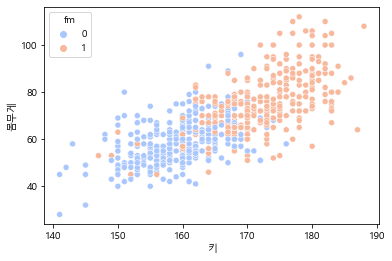

In [62]:
#원본데이터 시각화
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=clust_df,hue='fm',palette='coolwarm')

<AxesSubplot:xlabel='키', ylabel='몸무게'>

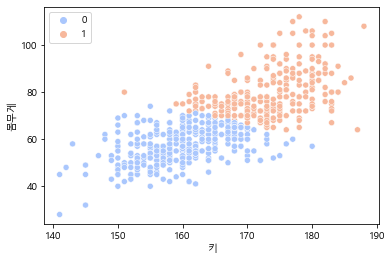

In [61]:
#kmeans예측 군집화 시각화
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=cluster_f,hue=clust_model.labels_,palette='coolwarm')

<AxesSubplot:xlabel='키', ylabel='몸무게'>

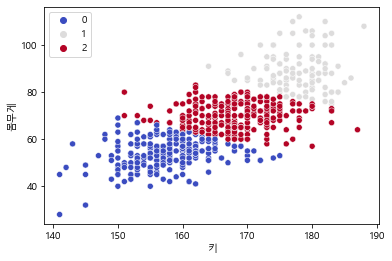

In [19]:
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=cluster_f,hue=clust_model.labels_,palette='coolwarm')

In [60]:
pd.crosstab(clust_df['fm'],clust_df['clust'])

clust,0,1
fm,,
0,284,37
1,82,234
